<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/PCA_without_sklearn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Results WITHOUT PCA:
Accuracy: 0.96

Classification Results WITH PCA:
Accuracy: 0.99



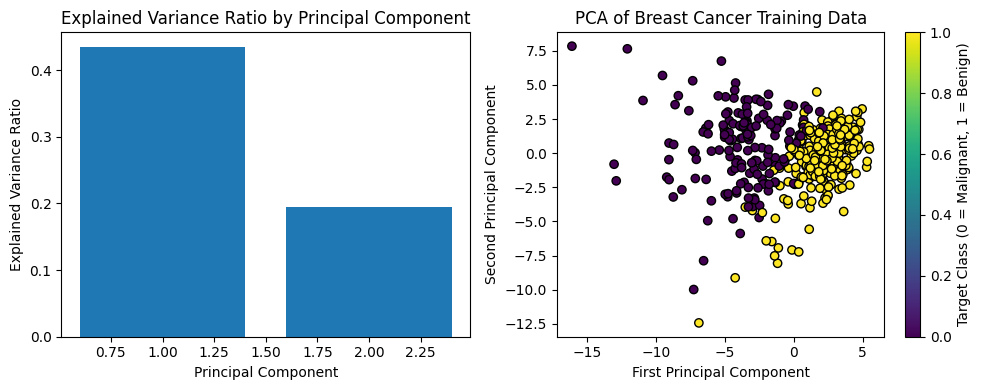

In [1]:


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0 for malignant, 1 for benign)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and corresponding eigenvectors
eigenvalue_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_idx]
eigenvectors_sorted = eigenvectors[:, eigenvalue_idx]

# Step 6: Select the number of components (2 in this case)
num_components = 2
selected_eigenvectors = eigenvectors_sorted[:, :num_components]

# Step 7: Project the data onto the selected eigenvectors
X_train_pca = np.dot(X_train_scaled, selected_eigenvectors)
X_test_pca = np.dot(X_test_scaled, selected_eigenvectors)

# Step 8: Train a machine learning model (Random Forest) without PCA
clf_no_pca = RandomForestClassifier(random_state=42)
clf_no_pca.fit(X_train_scaled, y_train)

# Make predictions on the test set without PCA
y_pred_no_pca = clf_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Step 9: Train a machine learning model (Random Forest) on the reduced data
clf_with_pca = RandomForestClassifier(random_state=42)
clf_with_pca.fit(X_train_pca, y_train)

# Make predictions on the test set with PCA
y_pred_with_pca = clf_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

# Step 10: Display classification results
print("Classification Results WITHOUT PCA:")
print(f"Accuracy: {accuracy_no_pca:.2f}\n")

print("Classification Results WITH PCA:")
print(f"Accuracy: {accuracy_with_pca:.2f}\n")

# Step 11: Visualize the importance of PCA
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, num_components + 1), eigenvalues_sorted[:num_components] / np.sum(eigenvalues_sorted))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

# Plot the data in the reduced-dimensional space
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Training Data')
plt.colorbar(label='Target Class (0 = Malignant, 1 = Benign)')

plt.tight_layout()
plt.show()